<a href="https://colab.research.google.com/github/Atharvnam/Codsoft-Internship/blob/main/Codsoft_DataScience_Task_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task : 3 Credit Card Fraud Detection

Batch : A24

Domain : Data Science

# Task : CREDIT CARD FRAUD DETECTION


*   Build a machine learning model to identify fraudulent credit card
transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.

*   Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
*   Evaluate the model'
s performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.

*   Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.



Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

Read The Data

In [2]:
credit_card = pd.read_csv('/content/creditcard.csv')
credit_card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,31025,-0.724757,0.649594,1.727010,-0.539584,0.889184,-1.034725,1.456742,-0.716376,-0.216859,...,-0.069338,0.250276,-0.281149,0.476644,0.384563,0.324725,-0.442016,-0.363683,0.00,0.0
20410,31026,-2.317953,-0.691477,1.265161,-0.376933,2.573624,-1.276860,-0.633667,0.205119,-0.307739,...,-0.398602,-1.058315,-0.618345,-0.861632,0.328694,0.092234,0.367453,0.006334,0.89,0.0
20411,31026,-1.327280,1.224650,0.796178,1.153083,-0.236519,0.924243,0.310683,0.751678,-0.420871,...,0.042767,0.429560,-0.098114,-0.278733,-0.149580,-0.214172,0.347256,0.151598,82.57,0.0
20412,31027,0.132756,-0.431359,-0.909160,-3.105432,1.878086,2.976224,-0.320295,0.627178,-2.848177,...,-0.068812,0.021002,-0.077043,0.995254,-0.255149,-0.219462,0.167155,0.166190,25.00,0.0


In [3]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
20409,31025,-0.724757,0.649594,1.727010,-0.539584,0.889184,-1.034725,1.456742,-0.716376,-0.216859,...,-0.069338,0.250276,-0.281149,0.476644,0.384563,0.324725,-0.442016,-0.363683,0.00,0.0
20410,31026,-2.317953,-0.691477,1.265161,-0.376933,2.573624,-1.276860,-0.633667,0.205119,-0.307739,...,-0.398602,-1.058315,-0.618345,-0.861632,0.328694,0.092234,0.367453,0.006334,0.89,0.0
20411,31026,-1.327280,1.224650,0.796178,1.153083,-0.236519,0.924243,0.310683,0.751678,-0.420871,...,0.042767,0.429560,-0.098114,-0.278733,-0.149580,-0.214172,0.347256,0.151598,82.57,0.0
20412,31027,0.132756,-0.431359,-0.909160,-3.105432,1.878086,2.976224,-0.320295,0.627178,-2.848177,...,-0.068812,0.021002,-0.077043,0.995254,-0.255149,-0.219462,0.167155,0.166190,25.00,0.0
20413,31027,1.257126,0.344870,0.303501,0.694626,-0.385154,-1.077230,0.075644,-0.194959,0.055911,...,-0.289668,-0.842265,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20414 non-null  int64  
 1   V1      20414 non-null  float64
 2   V2      20414 non-null  float64
 3   V3      20414 non-null  float64
 4   V4      20414 non-null  float64
 5   V5      20414 non-null  float64
 6   V6      20414 non-null  float64
 7   V7      20414 non-null  float64
 8   V8      20414 non-null  float64
 9   V9      20414 non-null  float64
 10  V10     20414 non-null  float64
 11  V11     20414 non-null  float64
 12  V12     20414 non-null  float64
 13  V13     20414 non-null  float64
 14  V14     20414 non-null  float64
 15  V15     20414 non-null  float64
 16  V16     20414 non-null  float64
 17  V17     20414 non-null  float64
 18  V18     20414 non-null  float64
 19  V19     20414 non-null  float64
 20  V20     20414 non-null  float64
 21  V21     20414 non-null  float64
 22

In [5]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,...,20414.000000,20414.000000,20414.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000
mean,15880.030126,-0.244137,0.235304,0.746259,0.273772,-0.164187,0.092052,-0.141890,0.020625,0.616372,...,-0.045520,-0.143357,-0.038522,0.010198,0.124062,0.031410,0.013809,0.007390,70.697696,0.004213
std,10653.852085,1.886242,1.523911,1.757284,1.461833,1.425048,1.328919,1.330981,1.344349,1.278878,...,0.832991,0.638849,0.519541,0.591599,0.437543,0.528235,0.396822,0.248255,205.318818,0.064772
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.728650,-7.495741,-1.338556,-8.567638,-3.612114,0.000000,0.000000
25%,4766.750000,-0.960555,-0.334134,0.307746,-0.638723,-0.746520,-0.657199,-0.597991,-0.171259,-0.225391,...,-0.258423,-0.560824,-0.175154,-0.333510,-0.137728,-0.341405,-0.068528,-0.010654,5.900000,0.000000
50%,15833.000000,-0.302521,0.214177,0.896730,0.225655,-0.201416,-0.174142,-0.071114,0.023868,0.591965,...,-0.113840,-0.115318,-0.047817,0.061608,0.161641,-0.039429,0.004515,0.019236,16.500000,0.000000
75%,26686.750000,1.164125,0.866939,1.532066,1.140159,0.339677,0.485913,0.449385,0.279391,1.386226,...,0.051946,0.258064,0.073657,0.398624,0.402988,0.326835,0.096916,0.077603,60.090000,0.000000
max,31027.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


Data Cleaning

In [10]:
#check null/missing values in data
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No Null Values Present

# Hence, Data Cleaned

# EDA (Exploratory data Analysis)

In [11]:
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
credit_card.Class.unique()

array([0., 1.])

Class Columns has two values i.e 0 & 1 where 1 is Fraud Case and 0 is Valid case.

Determine Number of fraud cases in the dataset

In [13]:
fraud_case = credit_card[credit_card['Class'] == 1]
valid_case = credit_card[credit_card['Class'] == 0]
print(f"Number of Fraud Case: {len(fraud_case)}")
print(f"Number of Valid Case: {len(valid_case)}")
total =  len(fraud_case) / len(valid_case)
total

Number of Fraud Case: 86
Number of Valid Case: 20327


0.0042308259949820435

In [14]:
#In percentage
percent = len(fraud_case) / len(credit_card['Class']) * 100
percent

0.4213001518640082

:: Only 0.24% transaction is fraudlent

Class Distribution

In [15]:
# Count the number of occurrences for each class (0 for legitimate, 1 for fraudulent)
class_counts = credit_card['Class'].value_counts()

# Calculate the percentage of fraudulent transactions
percentage_fraudulent = (class_counts[1] / class_counts.sum()) * 100

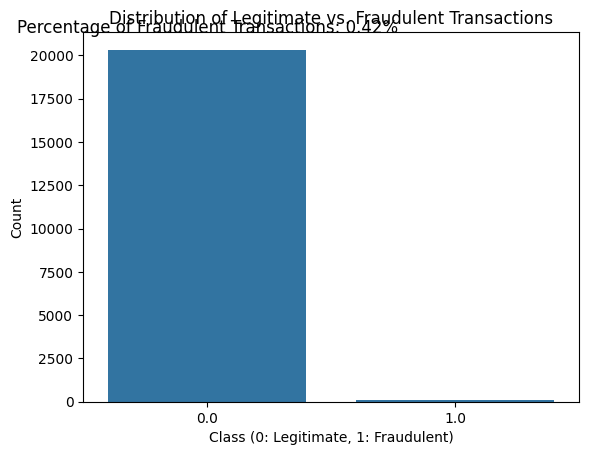

In [16]:
sns.countplot(x='Class', data=credit_card)
plt.title('Distribution of Legitimate vs. Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
# Display the percentage of fraudulent transactions on the plot
plt.text(0, class_counts[0] + 1000, f'Percentage of Fraudulent Transactions: {percentage_fraudulent:.2f}%', fontsize=12, ha='center')
plt.show()

Time Analysis

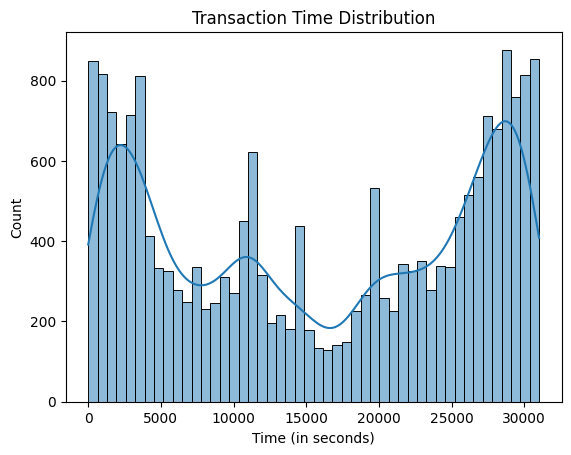

<Figure size 1000x600 with 0 Axes>

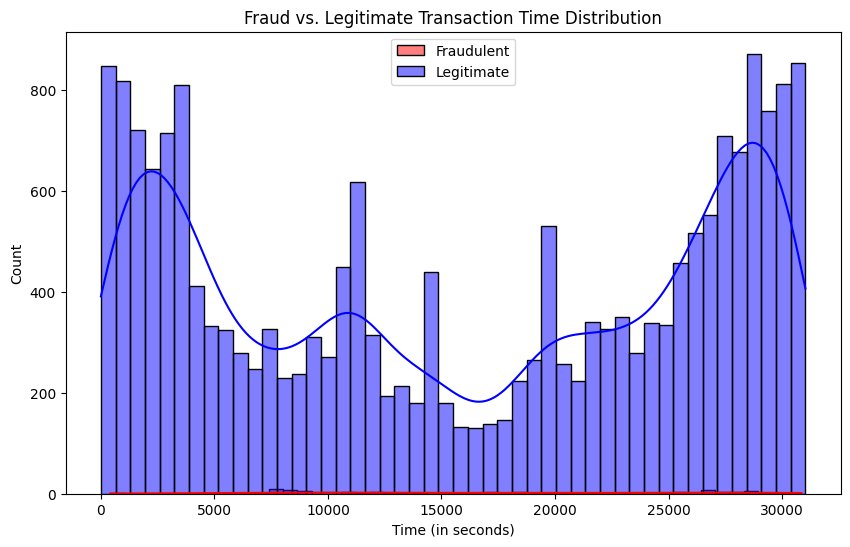

In [17]:
sns.histplot(credit_card['Time'], bins=48, kde=True)  # Using 48 bins for a daily view
plt.title('Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')
plt.figure(figsize=(10, 6))
# Check if there are specific times of day when fraud is more likely to occur
plt.figure(figsize=(10, 6))
sns.histplot(credit_card[credit_card['Class'] == 1]['Time'], bins=48, kde=True, color='red', label='Fraudulent')
sns.histplot(credit_card[credit_card['Class'] == 0]['Time'], bins=48, kde=True, color='blue', label='Legitimate')
plt.title('Fraud vs. Legitimate Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')
plt.legend()
plt.show()

Transaction Amount vs. Time:



*   Plot a scatter plot to examine the relationship between transaction amount and time.




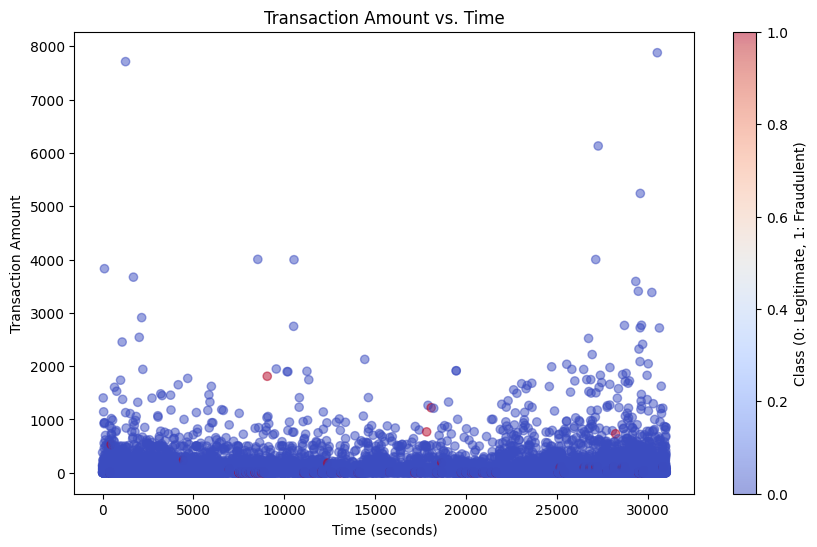

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(credit_card['Time'], credit_card['Amount'], c=credit_card['Class'], cmap='coolwarm', alpha=0.5)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Class (0: Legitimate, 1: Fraudulent)')
plt.show()

Visualize Heatmap for correlation matrix between features

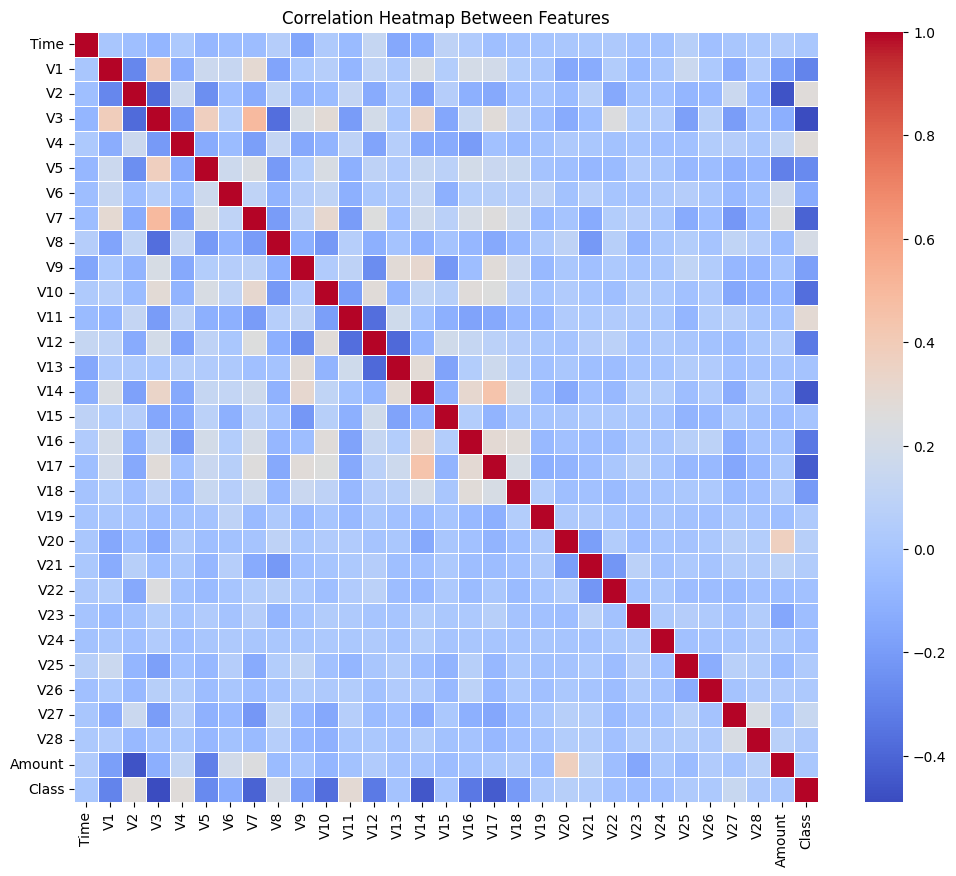

In [19]:
correlation_matrix = credit_card.corr()
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()

Feature Correlation

In [20]:
# Calculate the correlation matrix
correlation_matrix = credit_card.corr()
print(correlation_matrix)

# Filter the correlations of features with the target variable ('Class')
feature_correlations = correlation_matrix['Class'].drop('Class')
print(feature_correlations)
correlation_threshold = 0.1
highly_correlated_features = feature_correlations[abs(feature_correlations) > correlation_threshold]

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.002867 -0.039187 -0.085958  0.017589 -0.079987 -0.042169   
V1      0.002867  1.000000 -0.282131  0.384482 -0.125647  0.161928  0.137408   
V2     -0.039187 -0.282131  1.000000 -0.382361  0.156854 -0.250523 -0.044382   
V3     -0.085958  0.384482 -0.382361  1.000000 -0.205142  0.375282  0.063284   
V4      0.017589 -0.125647  0.156854 -0.205142  1.000000 -0.136667 -0.055320   
V5     -0.079987  0.161928 -0.250523  0.375282 -0.136667  1.000000  0.162585   
V6     -0.042169  0.137408 -0.044382  0.063284 -0.055320  0.162585  1.000000   
V7     -0.050946  0.301389 -0.129148  0.493070 -0.189353  0.226701  0.101602   
V8      0.055766 -0.166815  0.106635 -0.372076  0.123022 -0.205649 -0.098428   
V9     -0.160978  0.018291 -0.093987  0.216317 -0.140834  0.046516  0.056962   
V10     0.029374  0.058557 -0.056290  0.286620 -0.096140  0.223585  0.098976   
V11    -0.061939 -0.085332  0.123302 -0.

<ipython-input-21-315a082f255c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='magma')


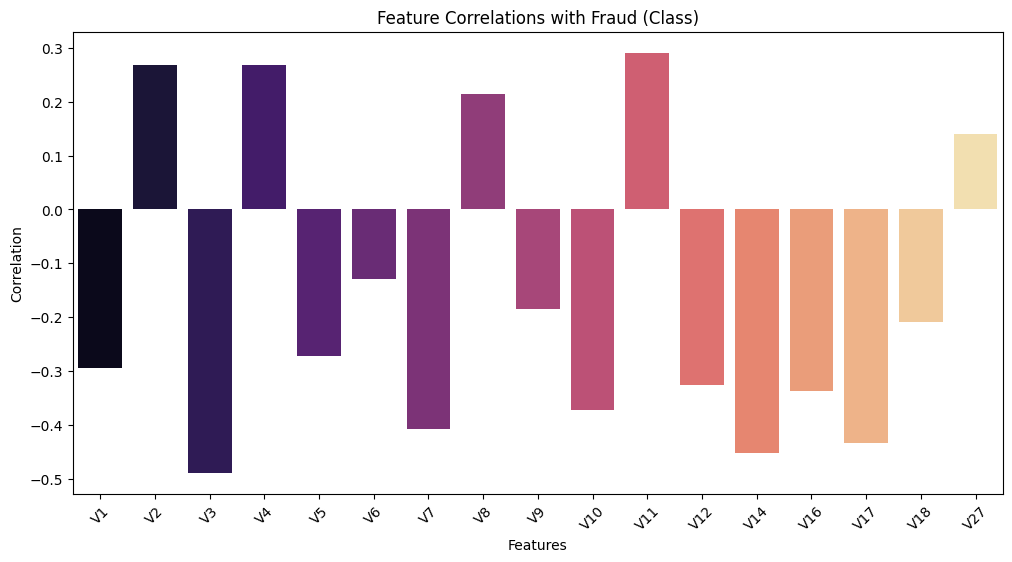

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='magma')
plt.title('Feature Correlations with Fraud (Class)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

# Developing Model

In [22]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

Defined X and Y

In [23]:
# Test value
X = credit_card.drop(['Class'], axis=1)
# Target value
Y = credit_card['Class']
print(f"value and shapes : {X.values,X.shape}")
print(f"value and shapes : {Y.values,Y.shape}")

value and shapes : (array([[ 0.00000000e+00, -1.35980713e+00, -7.27811730e-02, ...,
         1.33558377e-01, -2.10530530e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309900e-03,  1.47241690e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518410e-02,  3.78660000e+02],
       ...,
       [ 3.10260000e+04, -2.31795276e+00, -6.91477431e-01, ...,
         3.67453318e-01,  6.33428100e-03,  8.90000000e-01],
       [ 3.10260000e+04, -1.32728034e+00,  1.22465014e+00, ...,
         3.47255812e-01,  1.51598137e-01,  8.25700000e+01],
       [ 3.10270000e+04,  1.32755520e-01, -4.31359163e-01, ...,
         1.67155386e-01,  1.66190260e-01,  2.50000000e+01]]), (20413, 30))
value and shapes : (array([0., 0., 0., ..., 0., 0., 0.]), (20413,))


Spliting the data for training and Testing

In [24]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

Building Model


*   Random Forest is a popular choice for fraud detection because it can handle imbalanced datasets and capture complex relationships between features. We can further tune hyperparameters or explore feature importance to enhance the model's performance and interpretability.




In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
model.fit(X_train,Y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

In [26]:
print(y_pred)
print(Y_test)

[0. 0. 0. ... 0. 0. 0.]
17702    0.0
14228    0.0
7152     0.0
1087     0.0
14201    0.0
        ... 
12787    0.0
14518    0.0
1533     0.0
7921     0.0
1411     0.0
Name: Class, Length: 4083, dtype: float64


In [27]:
import sklearn.metrics

print("Confusion Matrix:\n", sklearn.metrics.confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", sklearn.metrics.classification_report(Y_test, y_pred))
print("\nAccuracy Score:", sklearn.metrics.accuracy_score(Y_test, y_pred))

Confusion Matrix:
 [[4067    1]
 [   4   11]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4068
         1.0       0.92      0.73      0.81        15

    accuracy                           1.00      4083
   macro avg       0.96      0.87      0.91      4083
weighted avg       1.00      1.00      1.00      4083


Accuracy Score: 0.9987754102375704
